# 1. Importación de Librerías y Carga de Datos
Usa pandas para cargar los datasets. (hacemos los respectivos pip install de cada librería.

In [8]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer  # Para manejar valores faltantes

# Cargar el dataset
df = pd.read_csv('heart_cleveland_upload.csv')

# Visualizar las primeras filas del dataset
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


# 2. Análisis Exploratorio de Datos (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
Columnas del Dataset: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


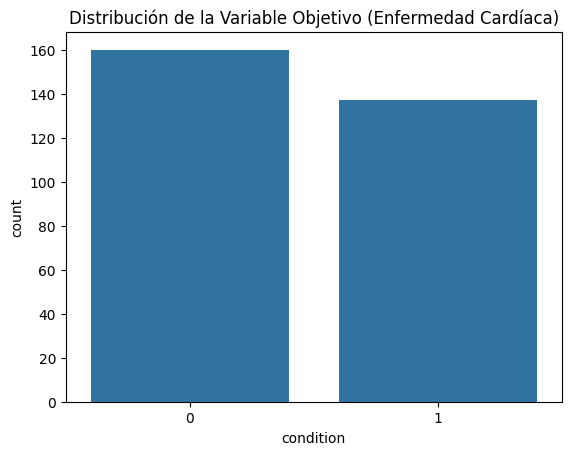

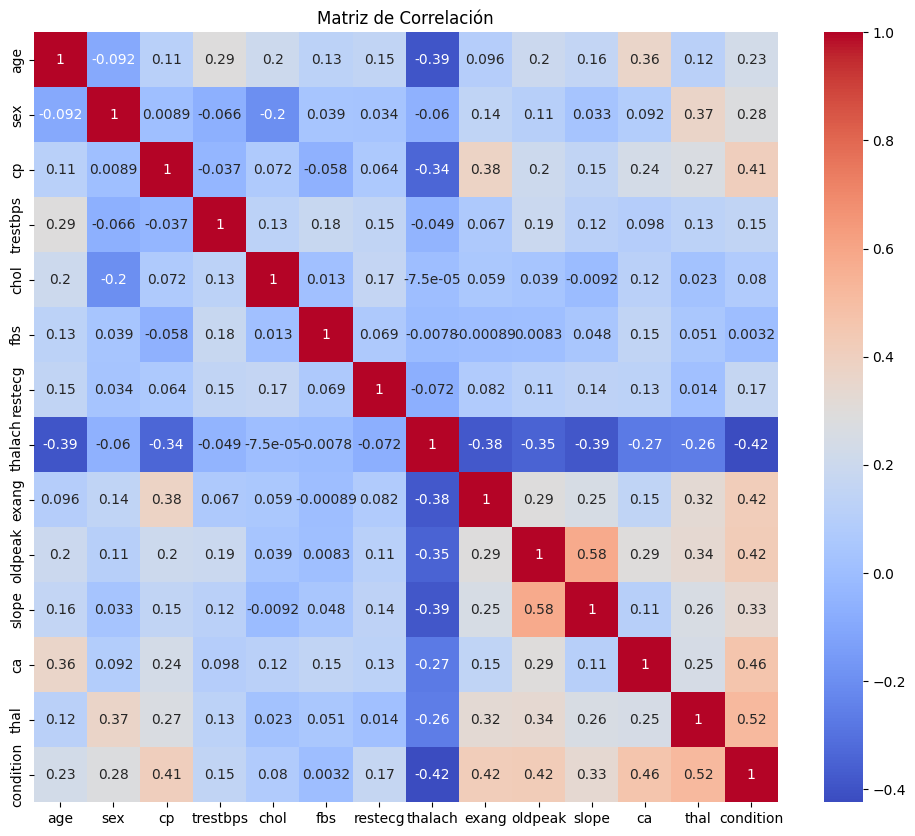

In [10]:
# Mostrar información general del dataset
df.info()
df.describe()

# Verificar los nombres de las columnas
print("Columnas del Dataset:", df.columns)

# Gráficas de distribución para la variable objetivo (condition)
sns.countplot(x='condition', data=df)
plt.title('Distribución de la Variable Objetivo (Enfermedad Cardíaca)')
plt.show()

# Matriz de correlación para ver la relación entre las características
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


# 3. Preprocesamiento de Datos

## Manejo de valores faltantes:

In [11]:
# Imputar valores faltantes con la media para las columnas numéricas
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Verificar que no haya valores faltantes
print(df.isnull().sum())


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


# 4. Selección de Características
Usa un mapa de calor para ver las correlaciones.

In [13]:
# Seleccionar características y variable objetivo
X = df.drop(['condition'], axis=1)
y = df['condition']

# Selección de características usando SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Visualización de las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)


Características seleccionadas: Index(['thalach', 'exang', 'oldpeak', 'ca', 'thal'], dtype='object')



# 5. División del Dataset en Conjuntos de Entrenamiento y Prueba

In [14]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


# 6. Entrenamiento de los Modelos

In [15]:
# Entrenamiento del modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# 7. Evaluación del Modelo

Accuracy: 0.80
Precision: 0.79
Recall: 0.79
F1-Score: 0.79


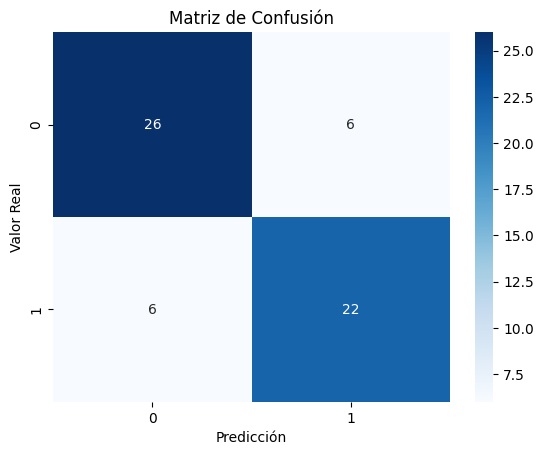

In [16]:
# Predicción en el conjunto de prueba
y_pred = logistic_model.predict(X_test)

# Evaluación de las métricas de desempeño
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()


# 8. Visualización de Resultados

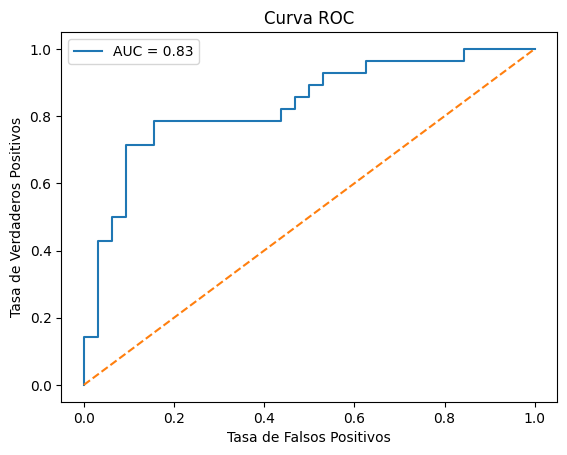

In [17]:
# Curva ROC para el modelo de Regresión Logística
y_prob = logistic_model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


La gráfica muestra la Curva ROC (Receiver Operating Characteristic) para el modelo de Regresión Logística aplicado al problema de predicción de la enfermedad cardíaca. La curva ROC es una representación gráfica de la capacidad del modelo para distinguir entre las clases positivas y negativas, en este caso, la presencia o ausencia de enfermedad cardíaca.

## Análisis de la Curva ROC:
1. AUC = 0.83: El área bajo la curva (AUC) es de 0.83, lo que indica que el modelo tiene una buena capacidad predictiva. El valor del AUC oscila entre 0 y 1, donde:

* Un valor de 0.5 representa un modelo sin capacidad predictiva, equivalente a hacer predicciones al azar.
* Un valor cercano a 1 indica un modelo con una excelente capacidad para distinguir entre clases.
* En este caso, un AUC de 0.83 indica que el modelo tiene un 83% de probabilidad de clasificar correctamente a un paciente con o sin enfermedad cardíaca.
2. Forma de la curva: La curva ROC está por encima de la línea diagonal (línea naranja), lo que indica que el modelo tiene un rendimiento mejor que el azar. Cuanto más se aleje la curva de la línea diagonal y más se acerque a la esquina superior izquierda, mejor será el rendimiento del modelo.

## Conclusión:
El modelo de Regresión Logística muestra un buen desempeño para predecir la presencia de enfermedad cardíaca, con un AUC de 0.83, lo que sugiere que el modelo es capaz de discriminar correctamente entre pacientes con y sin la condición en la mayoría de los casos. Sin embargo, aún podría haber margen de mejora, y se podrían explorar ajustes adicionales o técnicas avanzadas para optimizar el modelo.